<a href="https://colab.research.google.com/github/Sebastian-Cely/M1-Procesamiento-datos-secuenciales/blob/main/ModelAudio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/Sebastian-Cely/M1-Procesamiento-datos-secuenciales.git

Cloning into 'M1-Procesamiento-datos-secuenciales'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 139 (delta 9), reused 0 (delta 0), pack-reused 122
Receiving objects: 100% (139/139), 2.72 MiB | 6.85 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [11]:
#Importar librerías
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


**Cargar Datos**

In [12]:
def load_file(file_aud):
    # Cargar archivo con extensión .wav
    file_ext = tf.io.read_file(file_aud)
    # Decodificación wav
    wav, sample_rate = tf.audio.decode_wav(file_ext, desired_channels=1)
    # Removiendo eje final
    wav = tf.squeeze(wav, axis=-1)
    # Devolver archivo como vector numpy
    return wav


**Leer archivos de Audio**

(16016,)


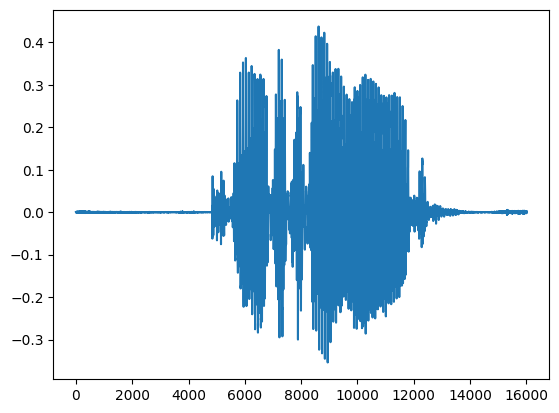

In [14]:
from IPython.display import Audio

# Definición de ruta para archivos de audio
PATH = "/content/M1-Procesamiento-datos-secuenciales/data/audio/corriendo-jd7.wav"

wave = load_file(PATH)
print(wave.shape)
plt.plot(wave)
display(Audio(wave, rate=16000))
